In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import datetime as dt 
import os 
import seaborn as sns 
import matplotlib.colors as mcolors
from config import MYSQL_DATABASE, MYSQL_HOST, MYSQL_PASSWORD, MYSQL_TABLE, MYSQL_USER

import mysql.connector

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
conn = mysql.connector.connect(
    host=MYSQL_HOST, 
    user=MYSQL_USER, 
    password=MYSQL_PASSWORD, 
    database=MYSQL_DATABASE
)

query = f'select * from {MYSQL_TABLE}'
df = pd.read_sql(query, conn)

conn.close()

In [13]:
start_date = pd.to_datetime('2025-05-18')
end_date = pd.to_datetime('2025-05-26')
df['Date'] = pd.to_datetime(df['Date'])
df_filted = df[(df['Date'] > start_date) & (df['Date']< end_date)]
df_filted

,id,Name,Date,Progression,Formula,DATA_TIME,ENGLISH_TIME,OTHER_TIME,RELAX_TIME,Walking,NoFap
105,9803,Day 07,2025-05-22,9.20,0.087360,4.0,0.5,4.0,3.0,2.0,1
106,9804,Day 08,2025-05-23,8.45,0.094677,5.0,0.5,2.0,3.0,2.0,1
107,9805,Day 09,2025-05-24,2.00,0.085928,0.5,0.5,10.0,4.0,1.0,1
108,9806,Day 10,2025-05-25,7.30,0.092278,2.0,0.0,8.0,5.0,0.0,1
112,9810,Day 05,2025-05-20,2.75,0.073273,3.0,0.0,0.0,10.0,1.0,1
113,9811,Day 06,2025-05-21,9.60,0.080008,4.0,0.0,1.5,3.0,4.0,1
114,9812,Day 04,2025-05-19,-11.00,0.079000,0.0,0.0,0.0,0.0,0.0,0


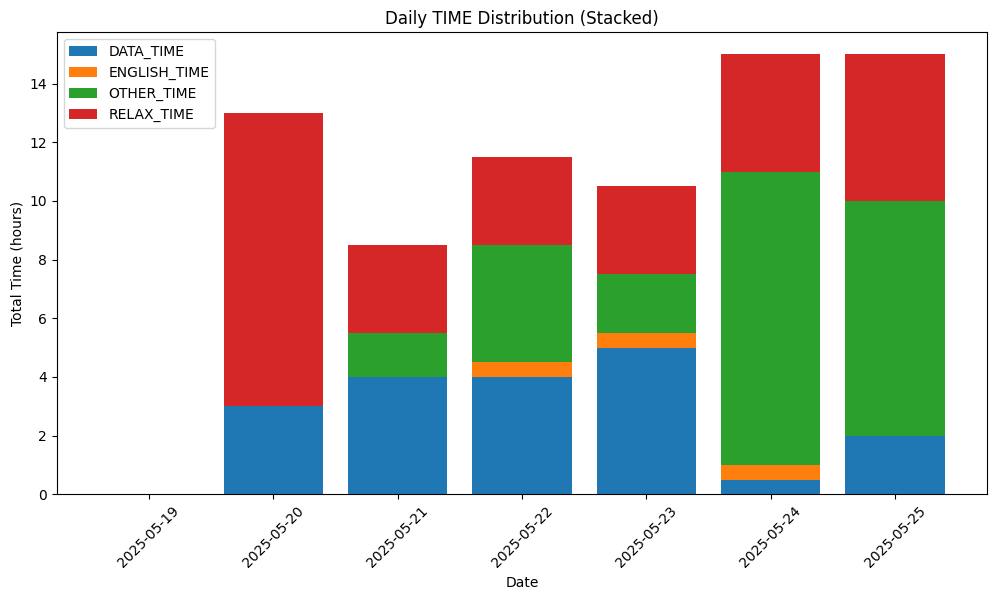

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Define the time columns you want to stack
time_columns = ['DATA_TIME', 'ENGLISH_TIME', 'OTHER_TIME', 'RELAX_TIME']

# Step 2: Prepare x (dates) and y (time values)
x = df_filted['Date']  
bottom = None

# Step 3: Create the stacked bar chart
plt.figure(figsize=(12, 6))

for col in time_columns:
    if bottom is None:
        plt.bar(x, df_filted[col], label=col)
        bottom = df_filted[col].copy()
    else:
        plt.bar(x, df_filted[col], bottom=bottom, label=col)
        bottom += df_filted[col]

# Step 4: Finalize the chart
plt.title("Daily TIME Distribution (Stacked)")
plt.xlabel("Date")
plt.ylabel("Total Time (hours)")
plt.xticks(rotation=45)
plt.legend()
plt.show()
